In [1]:
import pandas as pd

# Sample synthetic dataset
data = {
    'message': [
        "Win a free iPhone now!",
        "Hey, are we still meeting tomorrow?",
        "Limited time offer, buy now!",
        "Your account has been credited with $1000",
        "Let's catch up for coffee",
        "You have been selected for a prize!",
        "Can you send me the report?",
        "Congratulations, you won a gift card!",
        "Are you coming to the party?",
        "Get a loan with low interest rates"
    ],
    'label': ['spam', 'non-spam', 'spam', 'spam', 'non-spam', 'spam', 'non-spam', 'spam', 'non-spam', 'spam']
}

df = pd.DataFrame(data)
print(df)


                                     message     label
0                     Win a free iPhone now!      spam
1        Hey, are we still meeting tomorrow?  non-spam
2               Limited time offer, buy now!      spam
3  Your account has been credited with $1000      spam
4                  Let's catch up for coffee  non-spam
5        You have been selected for a prize!      spam
6                Can you send me the report?  non-spam
7      Congratulations, you won a gift card!      spam
8               Are you coming to the party?  non-spam
9         Get a loan with low interest rates      spam


In [2]:
import re
import string

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub('\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading and trailing spaces
    return text

# Apply preprocessing
df['message'] = df['message'].apply(preprocess_text)
print(df)


                               message     label
0                win a free iphone now      spam
1    hey are we still meeting tomorrow  non-spam
2           limited time offer buy now      spam
3  your account has been credited with      spam
4             lets catch up for coffee  non-spam
5   you have been selected for a prize      spam
6           can you send me the report  non-spam
7  congratulations you won a gift card      spam
8          are you coming to the party  non-spam
9   get a loan with low interest rates      spam


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

print(X.toarray())  # Display the vectorized form


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.5182909  0.         0.         0.         0.         0.
  0.         0.5182909  0.         0.         0.         0.
  0.         0.         0.44059462 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.5182909
  0.         0.         0.         0.        ]
 [0.         0.35535858 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.41802399
  0.         0.         0.         0.         0.         0.
  0.         0.41802399 0.         0.         0.         0.
  0.         0.         0.         0.         0.41802399 0.
  0.         0.         0.41802399 0.         0.41802399 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.46015789 0.   

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)


MultinomialNB()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


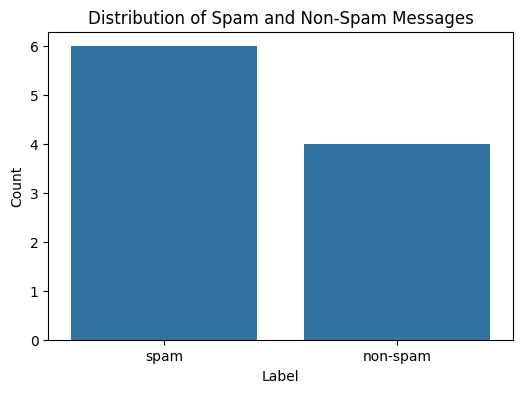

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


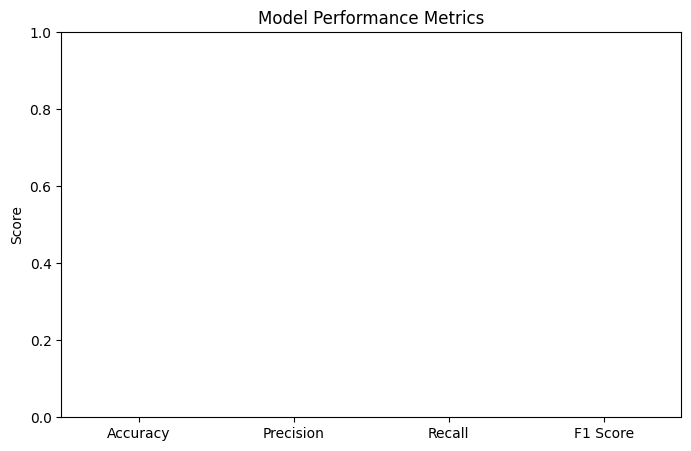

In [7]:
# Performance metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plot the performance metrics
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()
